In [1]:
import numpy as np
from sympy import *
import re
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use("./deeplearning.mplstyle")
from matplotlib.widgets import TextBox
from matplotlib.widgets import Button
import ipywidgets as widgets
from lab_utils_backprop import *

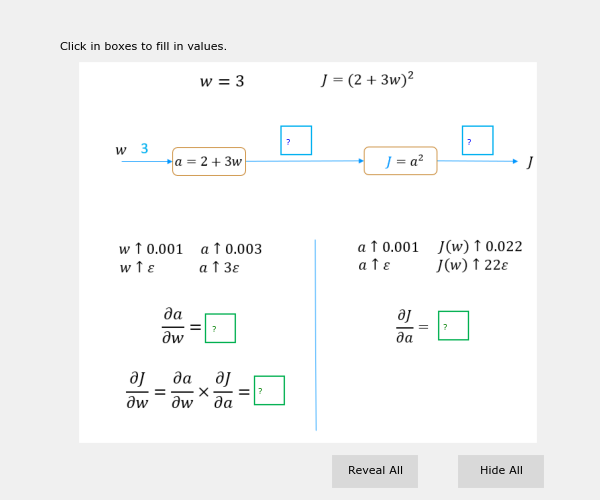

In [2]:
plt.close("all")
plt_network(config_nw0, "./images/C2_W2_BP_network0.PNG")

In [3]:
w = 3
a = 2+3*w
J = a**2
print(f"a = {a}, J = {J}")

a = 11, J = 121


### $\frac{\partial J}{\partial a}$ 

In [4]:
a_epsilon = a + 0.001       # a epsilon
J_epsilon = a_epsilon**2    # J_epsilon
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_da ~= k = {k} ")

J = 121, J_epsilon = 121.02200099999999, dJ_da ~= k = 22.000999999988835 


In [5]:
sw,sJ,sa = symbols('w,J,a')
sJ = sa**2
sJ

a**2

In [6]:
sJ.subs([(sa,a)])

121

In [7]:
dJ_da = diff(sJ, sa)
dJ_da

2*a

### $\frac{\partial a}{\partial w}$ 

In [8]:
w_epsilon = w + 0.001       # a  plus a small value, epsilon
a_epsilon = 2 + 3*w_epsilon
k = (a_epsilon - a)/0.001   # difference divided by epsilon
print(f"a = {a}, a_epsilon = {a_epsilon}, da_dw ~= k = {k} ")

a = 11, a_epsilon = 11.003, da_dw ~= k = 3.0000000000001137 


In [9]:
sa = 2 + 3*sw
sa

3*w + 2

In [10]:
da_dw = diff(sa,sw)
da_dw

3

In [11]:
dJ_dw = da_dw * dJ_da
dJ_dw

6*a

In [12]:
w_epsilon = w + 0.001
a_epsilon = 2 + 3*w_epsilon
J_epsilon = a_epsilon**2
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 121, J_epsilon = 121.06600900000001, dJ_dw ~= k = 66.0090000000082 


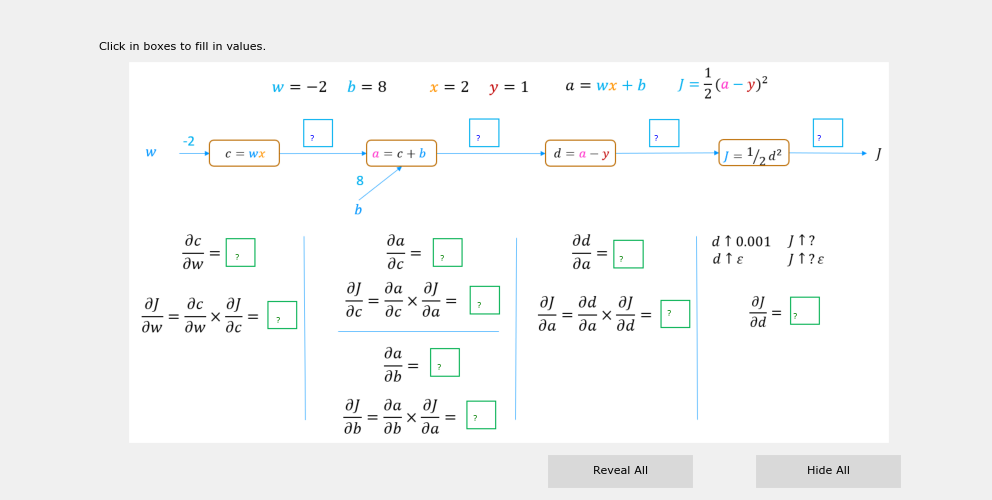

In [13]:
plt.close("all")
plt_network(config_nw1, "./images/C2_W2_BP_network1.PNG")

In [14]:
# Inputs and parameters
x = 2
w = -2
b = 8
y = 1
# calculate per step values   
c = w * x
a = c + b
d = a - y
J = d**2/2
print(f"J={J}, d={d}, a={a}, c={c}")

J=4.5, d=3, a=4, c=-4


In [15]:
d_epsilon = d + 0.001
J_epsilon = d_epsilon**2/2
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dd ~= k = {k} ")

J = 4.5, J_epsilon = 4.5030005, dJ_dd ~= k = 3.0004999999997395 


In [16]:
sx,sw,sb,sy,sJ = symbols('x,w,b,y,J')
sa, sc, sd = symbols('a,c,d')
sJ = sd**2/2
sJ

d**2/2

In [18]:
sJ.subs([(sd, d)])

9/2

In [19]:
dJ_dd = diff(sJ, sd)
dJ_dd

d

In [20]:
a_epsilon = a + 0.001         # a  plus a small value
d_epsilon = a_epsilon - y
k = (d_epsilon - d)/0.001   # difference divided by epsilon
print(f"d = {d}, d_epsilon = {d_epsilon}, dd_da ~= k = {k} ")

d = 3, d_epsilon = 3.0010000000000003, dd_da ~= k = 1.000000000000334 


In [21]:
sd = sa - sy
sd

a - y

In [22]:
dd_da = diff(sd,sa)
dd_da

1

In [23]:
dJ_da = dd_da * dJ_dd
dJ_da

d

In [24]:
a_epsilon = a + 0.001
d_epsilon = a_epsilon - y
J_epsilon = d_epsilon**2/2
k = (J_epsilon - J)/0.001   
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_da ~= k = {k} ")

J = 4.5, J_epsilon = 4.503000500000001, dJ_da ~= k = 3.0005000000006277 


In [25]:
sa = sc + sb
sa

b + c

In [26]:
da_dc = diff(sa,sc)
da_db = diff(sa,sb)
print(da_dc, da_db)

1 1


In [27]:
dJ_dc = da_dc * dJ_da
dJ_db = da_db * dJ_da
print(f"dJ_dc = {dJ_dc},  dJ_db = {dJ_db}")

dJ_dc = d,  dJ_db = d


In [28]:
sc = sw * sx
sc

w*x

In [29]:
dc_dw = diff(sc,sw)
dc_dw

x

In [30]:
dJ_dw = dc_dw * dJ_dc
dJ_dw

d*x

In [31]:
print(f"dJ_dw = {dJ_dw.subs([(sd,d),(sx,x)])}")

dJ_dw = 2*d


In [32]:
J_epsilon = ((w+0.001)*x+b - y)**2/2
k = (J_epsilon - J)/0.001  
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 4.5, J_epsilon = 4.506002, dJ_dw ~= k = 6.001999999999619 
